## tensorflow variable test

In [18]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()

g_1 = tf.Graph()
with g_1.as_default():
    v_1 = tf.constant([1.0, 2.0], name="a{}".format(5))
    v_2 = tf.Variable(250, name="v")
    v_3 = tf.placeholder(tf.float32, shape=[2, 3], name="v3")
    v_4 = tf.placeholder(tf.float32, shape=[3, 4], name="v4")
    add = tf.matmul(v_3, v_4)
    
g_2 = tf.Graph()
with g_2.as_default():
    v = tf.constant([2.0, 3.0], name="b")
    
with tf.Session(graph=g_1) as sess:
    data_1 = np.random.rand(2, 3)
    data_2 = np.random.rand(3, 4)
    print("data: {}".format(data_1))
    print("shape of data: {}".format(data_1.shape))
    print("data: {}".format(data_2))
    print("shape of data: {}".format(data_2.shape))
    init_op = tf.global_variables_initializer()
    init_op.run()
    print("variable name: {}".format(v_1.name))
    print("v1:{}".format(v_1))
    print("v2:{}".format(v_2))
    v1 = sess.run(v_1)
    print("value: {}".format(v1))
#     v_name = sess.run(tf.get_variable("v"))
    v2 = sess.run(v_2)
    print("variable name: {}".format(v2))
    result = sess.run(add, feed_dict={v_3: data_1, v_4: data_2})
    print("result: {}".format(result))
    print("shape of result: {}".format(result.shape))



data: [[0.469458   0.38770545 0.55136102]
 [0.19575041 0.08710026 0.20084627]]
shape of data: (2, 3)
data: [[0.30722939 0.00481326 0.72655215 0.11733337]
 [0.26126346 0.69047562 0.28411424 0.13807881]
 [0.11995844 0.59943244 0.356108   0.69477174]]
shape of data: (3, 4)
variable name: a5:0
v1:Tensor("a5:0", shape=(2,), dtype=float32)
v2:<tf.Variable 'v:0' shape=() dtype=int32_ref>
value: [1. 2.]
variable name: 250
result: [[0.31166497 0.60046446 0.6475824  0.49168706]
 [0.1069896  0.18147658 0.23849225 0.17453706]]
shape of result: (2, 4)


## tensorflow model infomation

In [19]:
import tensorflow as tf
tf.reset_default_graph()

with tf.Session() as sess:
    saver = tf.train.import_meta_graph("./NN_models/model.ckpt-299.meta")
    model_file = tf.train.latest_checkpoint("./NN_models/")
    saver.restore(sess, model_file)
    saver.export_meta_graph("./NN_models/NN_model.ckpt.meta.json")
    tensor_in_model = tf.trainable_variables()
    g_variable = tf.global_variables()
    print("Global variables in model: {}".format(g_variable))
    print("Tensor in model: {}".format(tensor_in_model))
    variable_in_model = [v.name for v in tf.trainable_variables()]
    print("Trainable variables name in modle: {}".format(variable_in_model))
    g = tf.get_default_graph()
    operations_in_model = g.get_operations()
    print("Operations in model: {}".format(operations_in_model))
    
#     operations_in_model = g.get_operations_by_name("")
#     value_in_model = [v.name for v in tf.trainable_variables()]
#     print("variables in modle: {}".format(value_in_model))
    weights_1 = sess.run(g.get_tensor_by_name("Layer1/weights_1:0"))
    print("Layers1 weights: {}".format(weights_1))
    


INFO:tensorflow:Restoring parameters from ./NN_models/model.ckpt-299
Global variables in model: [<tf.Variable 'Layer1/weights_1:0' shape=(1, 10) dtype=float32_ref>, <tf.Variable 'Layer1/biases_1:0' shape=(1, 10) dtype=float32_ref>, <tf.Variable 'Output/weights_2:0' shape=(10, 1) dtype=float32_ref>, <tf.Variable 'Output/biases_2:0' shape=(1, 1) dtype=float32_ref>]
Tensor in model: [<tf.Variable 'Layer1/weights_1:0' shape=(1, 10) dtype=float32_ref>, <tf.Variable 'Layer1/biases_1:0' shape=(1, 10) dtype=float32_ref>, <tf.Variable 'Output/weights_2:0' shape=(10, 1) dtype=float32_ref>, <tf.Variable 'Output/biases_2:0' shape=(1, 1) dtype=float32_ref>]
Trainable variables name in modle: ['Layer1/weights_1:0', 'Layer1/biases_1:0', 'Output/weights_2:0', 'Output/biases_2:0']
Operations in model: [<tf.Operation 'Input/x' type=Placeholder>, <tf.Operation 'Input/y' type=Placeholder>, <tf.Operation 'Layer1/random_normal/shape' type=Const>, <tf.Operation 'Layer1/random_normal/mean' type=Const>, <tf.Op

## restore method another

In [20]:
import tensorflow as tf
# tf.reset_default_graph()

with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state("./NN_models")
    model_path = ckpt.model_checkpoint_path
    print("Model path: {}".format(model_path))
    saver = tf.train.Saver()
    saver.restore(sess, model_path)
#     tensor_in_model = tf.trainable_variables()
    print("Tensor in model: {}".format(tensor_in_model))
#     variable_in_model = [v.name for v in tf.trainable_variables()]
#     print("Trainable variables in modle: {}".format(variable_in_model))
#     g = tf.get_default_graph()
#     operations_in_model = g.get_operations()
#     print("Operations in model: {}".format(operations_in_model))


Model path: ./NN_models/model.ckpt-299
INFO:tensorflow:Restoring parameters from ./NN_models/model.ckpt-299
Tensor in model: [<tf.Variable 'Layer1/weights_1:0' shape=(1, 10) dtype=float32_ref>, <tf.Variable 'Layer1/biases_1:0' shape=(1, 10) dtype=float32_ref>, <tf.Variable 'Output/weights_2:0' shape=(10, 1) dtype=float32_ref>, <tf.Variable 'Output/biases_2:0' shape=(1, 1) dtype=float32_ref>]


## save model

In [21]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
x1 = tf.placeholder(tf.int32, shape=[1], name="x")
y1 = tf.placeholder(tf.int32, shape=[1], name="y")
v1 = tf.Variable(tf.constant(125, shape=[1]), name="v_1")
v2 = tf.Variable(tf.constant(125, shape=[1]), name="v_2")
global_step = tf.Variable(0, trainable=False, name="global_step")
result = v1 + v2
tf.add_to_collection("result", result)
init_op = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    saver.save(sess, "./test_model/plus_model.ckpt")
    # 保存计算图的元数据结构
    saver.export_meta_graph("./test_model/plus_model.ckpt.meta.json", as_text=True)
#     v = sess.run(v1)
#     result = sess.run(result)
    
#     print("Value: {}".format(v))
#     print("Result: {}".format(result))


## reload model and redefine Graph

In [22]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
# 新建图结构
g = tf.Graph()
# 获取默认图结构
with g.as_default():
    x = tf.placeholder(tf.int32, name="x")
    v1 = tf.Variable(tf.constant(0, shape=[1]), name="v_1")
    v2 = tf.Variable(tf.constant(0, shape=[1]), name="v_2")
    global_step = tf.Variable(0, trainable=False, name="global_step")
    result = v1 + v2
    tf.add_to_collection("result", result)
with tf.Session(graph=g) as sess:
    saver = tf.train.Saver()
    ckpt = tf.train.get_checkpoint_state("./test_model")
    model_path = ckpt.model_checkpoint_path
    print("Model path: {}".format(model_path))
    saver.restore(sess, model_path)
    # 获取模型中tf.Variable定义的变量
    variable_in_model = tf.trainable_variables()
    print("Variables in model: {}".format(variable_in_model))
    # 获取全局变量
    g_variable = tf.global_variables()
    print("Global variables in model: {}".format(g_variable))
     # 获取本地变量
    local_variable = tf.local_variables()
    print("local variables: {}".format(local_variable))
    # 获取add_to_collecion添加的变量
    result_test = tf.get_collection("result")
    print("add to collecion: {}".format(result_test))
    
    # 获取tf.Vaiable定义变量的变量名称
    variable_in_model = [v.name for v in tf.trainable_variables()]
    print("Trainable variables name in modle: {}".format(variable_in_model))
    # 上下文管理器:获取默认图
    g = tf.get_default_graph()
    # 获取模型中的:操作
    operations_in_model = g.get_operations()
    print("Operations in model: {}".format(operations_in_model))
    # 通过操作名称获取操作
    name_operation_placeholder = g.get_operation_by_name('x')
    name_operation_outputs_placeholder = g.get_operation_by_name('x').outputs
    name_operation_outputs_value_placeholder = g.get_operation_by_name('x').outputs[0]
    print("operation name: {}".format(name_operation_placeholder))
    print("operation outputs: {}".format(name_operation_outputs_placeholder))
    print("operation outputs value: {}".format(name_operation_outputs_value_placeholder))
    
    name_operation = g.get_operation_by_name('v_1')
    name_operation_outputs = g.get_operation_by_name('v_1').outputs
    name_operation_outputs_value = g.get_operation_by_name('v_1').outputs[0]
    print("operation name: {}".format(name_operation))
    print("operation outputs: {}".format(name_operation_outputs))
    print("operation outputs value: {}".format(name_operation_outputs_value))
    
    g = tf.get_default_graph()
    print("Result: {}".format(sess.run(g.get_tensor_by_name("add:0"))))
    print("Result: {}".format(sess.run(g.get_tensor_by_name("v_1:0"))))
    print("Result: {}".format(sess.run(g.get_tensor_by_name("v_2:0"))))

    

Model path: ./test_model/plus_model.ckpt
INFO:tensorflow:Restoring parameters from ./test_model/plus_model.ckpt
Variables in model: [<tf.Variable 'v_1:0' shape=(1,) dtype=int32_ref>, <tf.Variable 'v_2:0' shape=(1,) dtype=int32_ref>]
Global variables in model: [<tf.Variable 'v_1:0' shape=(1,) dtype=int32_ref>, <tf.Variable 'v_2:0' shape=(1,) dtype=int32_ref>, <tf.Variable 'global_step:0' shape=() dtype=int32_ref>]
local variables: []
add to collecion: [<tf.Tensor 'add:0' shape=(1,) dtype=int32>]
Trainable variables name in modle: ['v_1:0', 'v_2:0']
Operations in model: [<tf.Operation 'x' type=Placeholder>, <tf.Operation 'Const' type=Const>, <tf.Operation 'v_1' type=VariableV2>, <tf.Operation 'v_1/Assign' type=Assign>, <tf.Operation 'v_1/read' type=Identity>, <tf.Operation 'Const_1' type=Const>, <tf.Operation 'v_2' type=VariableV2>, <tf.Operation 'v_2/Assign' type=Assign>, <tf.Operation 'v_2/read' type=Identity>, <tf.Operation 'global_step/initial_value' type=Const>, <tf.Operation 'globa

## reload model from source file

In [28]:
import tensorflow as tf
tf.reset_default_graph()

with tf.Session() as sess:
    saver = tf.train.import_meta_graph("test_model/plus_model.ckpt.meta")
    model_file = tf.train.latest_checkpoint("test_model/")
    saver.restore(sess, model_file)
    # 获取模型中tf.Variable定义的变量
    variable_in_model = tf.trainable_variables()
    print("Tensor in model: {}".format(variable_in_model))
    # 获取全局变量
    g_variable = tf.global_variables()
    print("Global variables in model: {}".format(g_variable))
    # 获取本地变量
    local_variable = tf.local_variables()
    print("local variables: {}".format(local_variable))
    # 获取tf.Vaiable定义变量的变量名称
    variable_in_model = [v.name for v in tf.trainable_variables()]
    print("Trainable variables name in modle: {}".format(variable_in_model))
    # 获取add_to_collecion添加的变量
    result_test = tf.get_collection("result")
    print("add to collecion: {}".format(result_test))
    '''上下文管理器:获取默认图'''
    g = tf.get_default_graph()

    # 获取模型中的:操作
    operations_in_model = g.get_operations()
    print("Operations in model: {}".format(operations_in_model))
#     # 通过操作名称获取操作
#     name_operation_placeholder = g.get_operation_by_name('x')
#     name_operation_outputs_placeholder = g.get_operation_by_name('x').outputs
#     name_operation_outputs_value_placeholder = g.get_operation_by_name('x').outputs[0]
#     print("operation name: {}".format(name_operation_placeholder))
#     print("operation name: {}".format(name_operation_outputs_placeholder))
#     print("operation name: {}".format(name_operation_outputs_value_placeholder))

    
#     name_operation = g.get_operation_by_name('v_1')
#     name_operation_outputs = g.get_operation_by_name('v_1').outputs
#     name_operation_outputs_value = g.get_operation_by_name('v_1').outputs[0]
#     print("operation name: {}".format(name_operation))
#     print("operation name: {}".format(name_operation_outputs))
#     print("operation name: {}".format(name_operation_outputs_value))
    
#     g = tf.get_default_graph()
#     print("Result: {}".format(sess.run(g.get_tensor_by_name("add:0"))))
#     print("Result: {}".format(sess.run(g.get_tensor_by_name("v_1:0"))))
#     print("Result: {}".format(sess.run(g.get_tensor_by_name("v_2:0"))))
    
    

INFO:tensorflow:Restoring parameters from test_model/plus_model.ckpt
Tensor in model: [<tf.Variable 'v_1:0' shape=(1,) dtype=int32_ref>, <tf.Variable 'v_2:0' shape=(1,) dtype=int32_ref>]
Global variables in model: [<tf.Variable 'v_1:0' shape=(1,) dtype=int32_ref>, <tf.Variable 'v_2:0' shape=(1,) dtype=int32_ref>, <tf.Variable 'global_step:0' shape=() dtype=int32_ref>]
local variables: []
Trainable variables name in modle: ['v_1:0', 'v_2:0']
add to collecion: [<tf.Tensor 'add:0' shape=(1,) dtype=int32>]
Operations in model: [<tf.Operation 'x' type=Placeholder>, <tf.Operation 'y' type=Placeholder>, <tf.Operation 'Const' type=Const>, <tf.Operation 'v_1' type=VariableV2>, <tf.Operation 'v_1/Assign' type=Assign>, <tf.Operation 'v_1/read' type=Identity>, <tf.Operation 'Const_1' type=Const>, <tf.Operation 'v_2' type=VariableV2>, <tf.Operation 'v_2/Assign' type=Assign>, <tf.Operation 'v_2/read' type=Identity>, <tf.Operation 'global_step/initial_value' type=Const>, <tf.Operation 'global_step' t

## test operation和tensor

In [24]:
import tensorflow as tf
tf.reset_default_graph()
# 节点即运算
# 新建节点(node),将值添加到图中,得到张量(tensor)
v1 = tf.constant(250, name="v_1")
v2 = tf.constant(250, name="v_2")
# 将运算(op)和张量(tensor)添加到默认图中,得到新的运算(op)
total = v1 + v2
# 新建操作(op),使用Variable封装,可操作对应的张量
v3 = tf.Variable(tf.constant(250), name="v_3")

print("variable 1 : {}".format(v1))
print("total : {}".format(total))
print("variable 3 : {}".format(v3))
with tf.Session() as sess:
    print("variable 1: {}".format(sess.run(v1)))
    print("total: {}".format(sess.run(total)))

variable 1 : Tensor("v_1:0", shape=(), dtype=int32)
total : Tensor("add:0", shape=(), dtype=int32)
variable 3 : <tf.Variable 'v_3:0' shape=() dtype=int32_ref>
variable 1: 250
total: 500


## new graph

In [25]:
import tensorflow as tf
tf.reset_default_graph()
g = tf.Graph()
config = tf.ConfigProto(log_device_placement=True)
with g.as_default():
    # 节点即运算
    # 新建节点(node),将值添加到图中,得到张量(tensor)
    # 使用name自定义名称
    v1 = tf.constant(250, shape=[1], name="v_1")
    v2 = tf.constant(250, name="v_2")
    # 系统自动分配name
    v3 = tf.constant(250)
    # 将运算(op)和张量(tensor)添加到默认图中,得到新的运算(op)
    total = v1 + v2
    # 新建操作(op),使用Variable封装,可操作对应的张量
    # 使用name自定义名称
    v4 = tf.Variable(tf.constant(250), name="v_4")
    # 使用系统分配name
    v5 = tf.Variable(tf.constant(250))
    

    print("variable 1 : {}".format(v1))
    print("total : {}".format(total))
    print("variable 3 : {}".format(v3))
    print("variable 4 : {}".format(v4))
    print("variable 5 : {}".format(v5))
    print("graph : {}".format(v1.graph is tf.get_default_graph()))
    
with tf.Session(graph=g, config=config) as sess:
    print("variable 1: {}".format(sess.run(v1)))
    print("total: {}".format(sess.run(total)))
    

variable 1 : Tensor("v_1:0", shape=(1,), dtype=int32)
total : Tensor("add:0", shape=(1,), dtype=int32)
variable 3 : Tensor("Const:0", shape=(), dtype=int32)
variable 4 : <tf.Variable 'v_4:0' shape=() dtype=int32_ref>
variable 5 : <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
graph : True
variable 1: [250]
total: [500]


## Tensor

In [26]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()

v1 = tf.Variable(np.random.rand(2, 3))
print("variable 1: {}".format(v1))

variable 1: <tf.Variable 'Variable:0' shape=(2, 3) dtype=float64_ref>


## session feed dict

In [27]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    v1 = tf.placeholder(tf.int32, shape=[1], name="v_1")
    v2 = tf.placeholder(tf.int32, shape=[1], name="v_1")
    total = v1 + v2
    with tf.Session() as sess:
        a = [125]
        b = [125]
        total = sess.run(total, feed_dict={v1: a, v2: b})
        print("total : {}".format(total))

# v1 = tf.Variable(np.random.rand(2, 3))
# print("variable 1: {}".format(v1))

total : [250]


## get default graph

In [28]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    v1 = tf.placeholder(tf.int32, shape=[1], name="v_1")
    v2 = tf.placeholder(tf.int32, shape=[1], name="v_1")
    print("graph address: {}".format(v1.graph))
    print("graph : {}".format(v1.graph is tf.get_default_graph()))

graph address: <tensorflow.python.framework.ops.Graph object at 0x7f889823fda0>
graph : True


## device

In [29]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
g = tf.Graph()
config = tf.ConfigProto(log_device_placement=True)
with g.as_default():
    
    v1 = tf.placeholder(tf.int32, shape=[1], name="v_1")
    v2 = tf.placeholder(tf.int32, shape=[1], name="v_1")
    v3 = tf.constant(250, shape=[1], name="v_1")
    v4 = tf.constant(250, name="v_2")
    total = v1 + v2
    with tf.Session(config=config) as sess:
        a = [125]
        b = [125]
        total = sess.run(total, feed_dict={v1: a, v2: b})
        print("total : {}".format(total))
#     with tf.device("/device:CPU:0"):
#         with tf.Session() as sess:
#             a = [125]
#             b = [125]
#             total = sess.run(total, feed_dict={v1: a, v2: b})
#             print("total : {}".format(total))

total : [250]


In [30]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
# g = tf.Graph()
config = tf.ConfigProto(log_device_placement=True)
v1 = tf.constant(250, shape=[1], name="v_1")
v2 = tf.constant(250, name="v_2")
# 系统自动分配name
v3 = tf.constant(250)
# 将运算(op)和张量(tensor)添加到默认图中,得到新的运算(op)
total = v1 + v2
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess.run(total))
print(config)


[500]
log_device_placement: true



In [31]:
import tensorflow as tf
tf.reset_default_graph()
# x = tf.placeholder(tf.int32, name="x")
v = tf.Variable(250, tf.int32, name="v_1")

# print("Node x placeholer: {}".format(x))
print("variable: {}".format(v))
print("variable name: {}".format(v.name))

variable: <tf.Variable 'v_1:0' shape=() dtype=int32_ref>
variable name: v_1:0


## Load image_object_detect.pb model

In [43]:
import tensorflow as tf
# from tensorflow.python.platform import gfile
from tensorflow.gfile import GFile
import numpy as np
import os
tf.reset_default_graph()

def load_pb_model():
    with tf.Session() as sess:
        '''Load *.pb model.'''
#         with gfile.FastGFile("./models/image_object_detect.pb", "rb") as f:
        with GFile("./models/image_object_detect.pb", "rb") as f:
            new_graph = tf.GraphDef()
            new_graph.ParseFromString(f.read())
            tf.import_graph_def(new_graph, name="")
        g = tf.get_default_graph()
        op_in_model = g.get_operations()
        print("Operations in model: \n{}".format(op_in_model))
        
load_pb_model()
        

Operations in model: 
[<tf.Operation 'input_1' type=Placeholder>, <tf.Operation 'conv2d_1/kernel' type=Const>, <tf.Operation 'conv2d_1/kernel/read' type=Identity>, <tf.Operation 'conv2d_1/bias' type=Const>, <tf.Operation 'conv2d_1/bias/read' type=Identity>, <tf.Operation 'conv2d_1/convolution' type=Conv2D>, <tf.Operation 'conv2d_1/BiasAdd' type=BiasAdd>, <tf.Operation 'activation_1/Relu' type=Relu>, <tf.Operation 'max_pooling2d_1/MaxPool' type=MaxPool>, <tf.Operation 'conv2d_2/kernel' type=Const>, <tf.Operation 'conv2d_2/kernel/read' type=Identity>, <tf.Operation 'conv2d_2/bias' type=Const>, <tf.Operation 'conv2d_2/bias/read' type=Identity>, <tf.Operation 'conv2d_2/convolution' type=Conv2D>, <tf.Operation 'conv2d_2/BiasAdd' type=BiasAdd>, <tf.Operation 'activation_2/Relu' type=Relu>, <tf.Operation 'conv2d_3/kernel' type=Const>, <tf.Operation 'conv2d_3/kernel/read' type=Identity>, <tf.Operation 'conv2d_3/bias' type=Const>, <tf.Operation 'conv2d_3/bias/read' type=Identity>, <tf.Operation

## Load nn_model.pb

In [50]:
import tensorflow as tf
from tensorflow.gfile import GFile
tf.reset_default_graph()

def load_pb_model():
    with tf.Session() as sess:
        with GFile("./models/nn_model.pb", "rb") as f:
            new_graph = tf.GraphDef()
            new_graph.ParseFromString(f.read())
            tf.import_graph_def(new_graph, name="")
        
        g = tf.get_default_graph()
        '''Read operation in models.'''
        op_in_model = g.get_operations()
        print("Operations in model: {}".format(op_in_model))
        '''Get nodes value by tensor name.'''
        weights_1 = g.get_tensor_by_name("Layer1/weights_1:0")
        print("Layer1 weights: {}".format(weights_1.eval()))
        
load_pb_model()

Operations in model: [<tf.Operation 'Input/x' type=Placeholder>, <tf.Operation 'Input/y' type=Placeholder>, <tf.Operation 'Layer1/weights_1' type=Const>, <tf.Operation 'Layer1/weights_1/read' type=Identity>, <tf.Operation 'Layer1/biases_1' type=Const>, <tf.Operation 'Layer1/biases_1/read' type=Identity>, <tf.Operation 'Layer1/MatMul' type=MatMul>, <tf.Operation 'Layer1/add' type=Add>, <tf.Operation 'Layer1/Relu' type=Relu>, <tf.Operation 'Output/weights_2' type=Const>, <tf.Operation 'Output/weights_2/read' type=Identity>, <tf.Operation 'Output/biases_2' type=Const>, <tf.Operation 'Output/biases_2/read' type=Identity>, <tf.Operation 'Output/MatMul' type=MatMul>, <tf.Operation 'Output/predictions' type=Add>]
Layer1 weights: [[-0.8285368   0.6586771  -1.3408427   0.26183295 -2.0627463   1.1609492
  -0.25681874  0.90142703  0.2808462  -0.17539701]]


## Load nn_model.pb model.

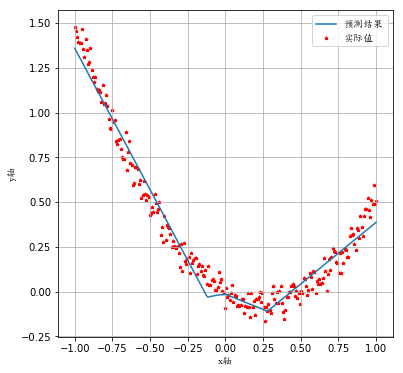

In [35]:
import tensorflow as tf
from tensorflow.gfile import GFile
# from tensorflow.python.platform import gfile
import matplotlib.pyplot as plt
tf.reset_default_graph()

from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import Axes3D
# Ubuntu system font path
font = FontProperties(fname='/usr/share/fonts/truetype/arphic/ukai.ttc')
def load_pb_model():
    with tf.Session() as sess:
        '''Input data for evaluate the model.'''
        x_data = np.linspace(-1, 1, 250, dtype=np.float32)[:, np.newaxis]
        noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
        y_data = np.square(x_data) - 0.5*x_data + noise
        '''Load model from *.pb'''
#         with gfile.FastGFile("./models/nn_model.pb", "rb") as f:
        with GFile("./models/nn_model.pb", "rb") as f:
            new_graph = tf.GraphDef()
            new_graph.ParseFromString(f.read())
            tf.import_graph_def(new_graph, name='')
        '''
        Get default graph structure, which operation must be
        after loaded the modelself.
        '''
        g = tf.get_default_graph()
        '''
        Get tensor by name in graph we defined,
        we use the variable scope or name scope,
        thus we need append the name prefix before load node names.
        '''
        pre = g.get_tensor_by_name("Output/predictions:0")
        x = g.get_tensor_by_name("Input/x:0")
        '''Compute the prediction value by loading the trained model.'''
        pre = sess.run(pre, feed_dict={x: x_data})
        plt.figure(figsize=(6, 6))
        plt.plot(x_data, pre, label="预测结果")
        plt.grid()
        plt.xlabel("x轴", fontproperties=font)
        plt.ylabel("y轴", fontproperties=font)
        plt.scatter(x_data, y_data, s=10, c="r", marker="*", label="实际值")
        plt.legend(prop=font)
    '''Save and show image.'''
#     plt.savefig("./images/pb_load.png", format="png")
    plt.show()
    
load_pb_model()